# Multi_Linear_Regression using Gradient Descent Algorithm 

Iteration 0:
  MSE = 15.3740, pred-actual = [-2.2 -2.8 -4.5 -3.7 -5.5], Gradient = [ -7.48 -25.44 -32.92] ,theta = [0.0748 0.2544 0.3292]
  Predictions: [0. 0. 0. 0. 0.]
  Actual:      [2.2 2.8 4.5 3.7 5.5]
--------------------------------------------------
Iteration 1:
  MSE = 2.8296, pred-actual = [-1.2124 -1.2288 -2.3452 -0.9616 -2.178 ], Gradient = [ -3.1704 -10.1768 -13.3472] ,theta = [0.106504 0.356168 0.462672]
  Predictions: [0.9876 1.5712 2.1548 2.7384 3.322 ]
  Actual:      [2.2 2.8 4.5 3.7 5.5]
--------------------------------------------------
Iteration 2:
  MSE = 0.7811, pred-actual = [-0.811984 -0.593144 -1.474304  0.144536 -0.836624], Gradient = [-1.428608 -4.010464 -5.439072] ,theta = [0.12079008 0.39627264 0.51706272]
  Predictions: [1.388016 2.206856 3.025696 3.844536 4.663376]
  Actual:      [2.2 2.8 4.5 3.7 5.5]
--------------------------------------------------
Iteration 3:
  MSE = 0.4459, pred-actual = [-0.64881184 -0.33547648 -1.12214112  0.59119424 -0.2954704 ],

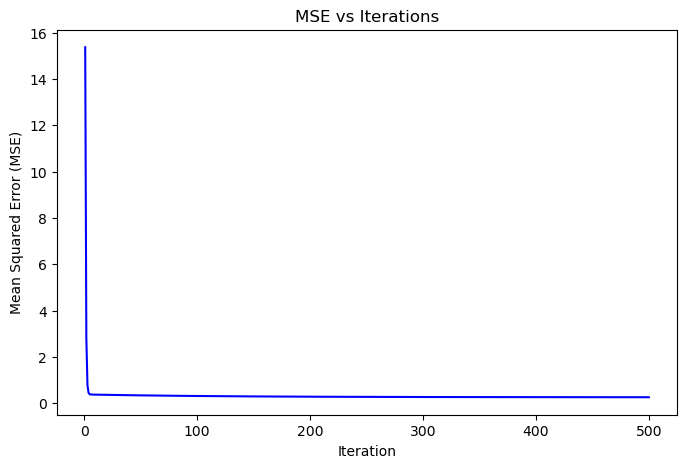

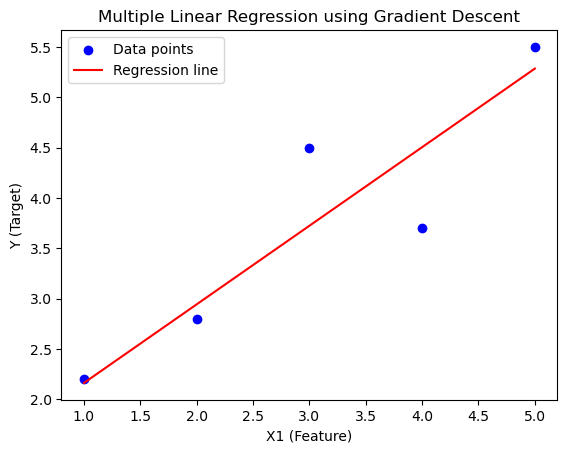

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data with multiple features (X1, X2)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])  # 5 samples, 2 features
Y = np.array([2.2, 2.8, 4.5, 3.7, 5.5])  # Target values

m = len(X)  # Number of data points
n = X.shape[1]  # Number of features (in this case, 2)

# Hyperparameters
alpha = 0.01  # Learning rate
max_iterations = 500  # Maximum number of iterations
tolerance = 1e-6  # Stopping criterion

# Add a column of ones to X for the intercept (beta_0)
X_b = np.c_[np.ones((m, 1)), X]  # Adds a column of 1s for the intercept term

# Initialize parameters (beta_0, beta_1, beta_2, ...)
theta = np.zeros(n + 1)  # One parameter for each feature + 1 for the intercept

# Keep track of MSE for each iteration
mse_history = []

# Gradient descent loop
for i in range(max_iterations):
    # Calculate predictions
    predictions = X_b.dot(theta)
    
    # Compute Mean Squared Error
    mse = (1 / m) * np.sum((predictions - Y) ** 2)
    mse_history.append(mse)
    
    # Compute gradients
    gradients = (2 / m) * X_b.T.dot(predictions - Y)
    
    # Update parameters
    theta -= alpha * gradients

    # Print progress at key iterations
    if i % 1 == 0 or i == 0:  # Print every 50 iterations or at iteration 0
        print(f"Iteration {i}:")
        print(f"  MSE = {mse:.4f}, pred-actual = {(predictions - Y)}, Gradient = {gradients} ,theta = {theta}")
        print(f"  Predictions: {predictions}")
        print(f"  Actual:      {Y}")
        print("-" * 50)

    # Stopping criterion: Stop early if the change in MSE is below the tolerance
    if i > 0 and abs(mse_history[-1] - mse_history[-2]) < tolerance:
        print(f"Stopping early at iteration {i}")
        break

# Final parameters
print(f"\nFinal parameters: {theta}")

# Plot MSE over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(mse_history) + 1), mse_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Iterations')
plt.show()

# Visualize the results
# For visualization, we are considering only the first feature (X1) for simplicity
plt.scatter(X[:, 0], Y, color="blue", label="Data points")
plt.plot(X[:, 0], X_b.dot(theta), color="red", label="Regression line")
plt.xlabel("X1 (Feature)")
plt.ylabel("Y (Target)")
plt.title("Multiple Linear Regression using Gradient Descent")
plt.legend()
plt.show()
